<a href="https://colab.research.google.com/github/alekivetz/CMPT-2400/blob/main/CMPT2400_NPRI_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Required Libraries & Load the Dataset


Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [38]:
# Load the dataset
xls = pd.ExcelFile('NPRI_2000-2022.xlsx')

# Dataset contains multiple sheets
print(xls.sheet_names)

# Set pandas to display all columns and prevent line breaks in columns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

['Releases 2000-2020', 'Disposals and Transfers 00-20', 'Comments']


The main factor of our prediction model will be pollutant releases over time, so we will focus on the releases sheet

In [27]:
df_original = pd.read_excel(xls, 'Releases 2000-2020')

Create a copy to avoid modifying original

In [29]:
df = df_original.copy()

Examine columns, remove French from headings for readability

In [30]:
df.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_d’estimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point ',
       'Release to Air - Road dust  ', 'Release to Air - Spills ',
       'Release to Air - Stack / Point  ',
       'Release to Air - Storage / Handling ', 'Releases to Land - Leaks',
       'Releases to Land - Other ', 'Releases to Land - Spills ',
       'Releases to Water Bodies - Direct Discharges ',
       'Releases to Water Bodies - Leaks',
       'Releases to Water Bodies - Spills ',
       'Sum of release to all media (<1tonne)'],
      dtype='object')

In [34]:
# Rename all columns with French headings
df = df.rename(columns={
    'Reporting_Year / Année' : 'Reporting_Year',
    'NPRI_ID / No_INRP' : 'NPRI_ID',
    'Company_Name / Dénomination_sociale_de_l\'entreprise' : 'Company_Name',
    'Facility_Name / Installation' : 'Facility_Name',
    'NAICS / Code_SCIAN' : 'NAICS',
    'NAICS Title / Titre Code_SCIAN' : 'NAICS_Title',
    'CAS_Number / No_CAS' : 'CAS_Number',
    'Substance Name (English) / Nom de substance (Anglais)' : 'Substance_Name',
    'PROVINCE' : 'Province',
    'Units / Unités' : 'Units',
    'Estimation_Method / Méthode_d’estimation' : 'Estimation_Method',
    'Value / Valeur' : 'Value'
})

df.head()

,Reporting_Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,City,Latitude,Longitude,CAS_Number,Substance_Name,Units,Estimation_Method,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,10049-04-4,Chlorine dioxide,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-56-1,Methanol,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-66-3,Chloroform,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,75-07-0,Acetaldehyde,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7647-01-0,Hydrochloric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Function to extract and display basic info about the dataset

In [46]:
def dataframe_summary(dataframe):
  print('Dataset Summary')
  print('-' * 106)

  # Shape
  print(f'Number of rows: {df.shape[0]}')
  print(f'Number of columns: {df.shape[1]}')

  print('\nColumn Overview')
  print('-' * 106)

  # Data types, missing value counts, and unique values
  summary = pd.DataFrame({
      'Data Type': df.dtypes,
      'Missing Values': df.isnull().sum(),
      'Missing Values (%)': round(df.isnull().sum() / len(df) * 100, 2),
      'Unique Values': df.nunique()
  })

  print(summary)
  print('-' * 106)

# Call function for our dataframe
dataframe_summary(df)

Dataset Summary
----------------------------------------------------------------------------------------------------------
Number of rows: 737516
Number of columns: 28

Column Overview
----------------------------------------------------------------------------------------------------------
                                              Data Type  Missing Values  Missing Values (%)  Unique Values
Reporting_Year                                    int64               0                0.00             23
NPRI_ID                                           int64               0                0.00          21868
Number of employees                              object             616                0.08           1884
Company_Name                                     object               0                0.00           9859
Facility_Name                                    object            1176                0.16          32102
NAICS                                             int64           

# 2. Visualizations

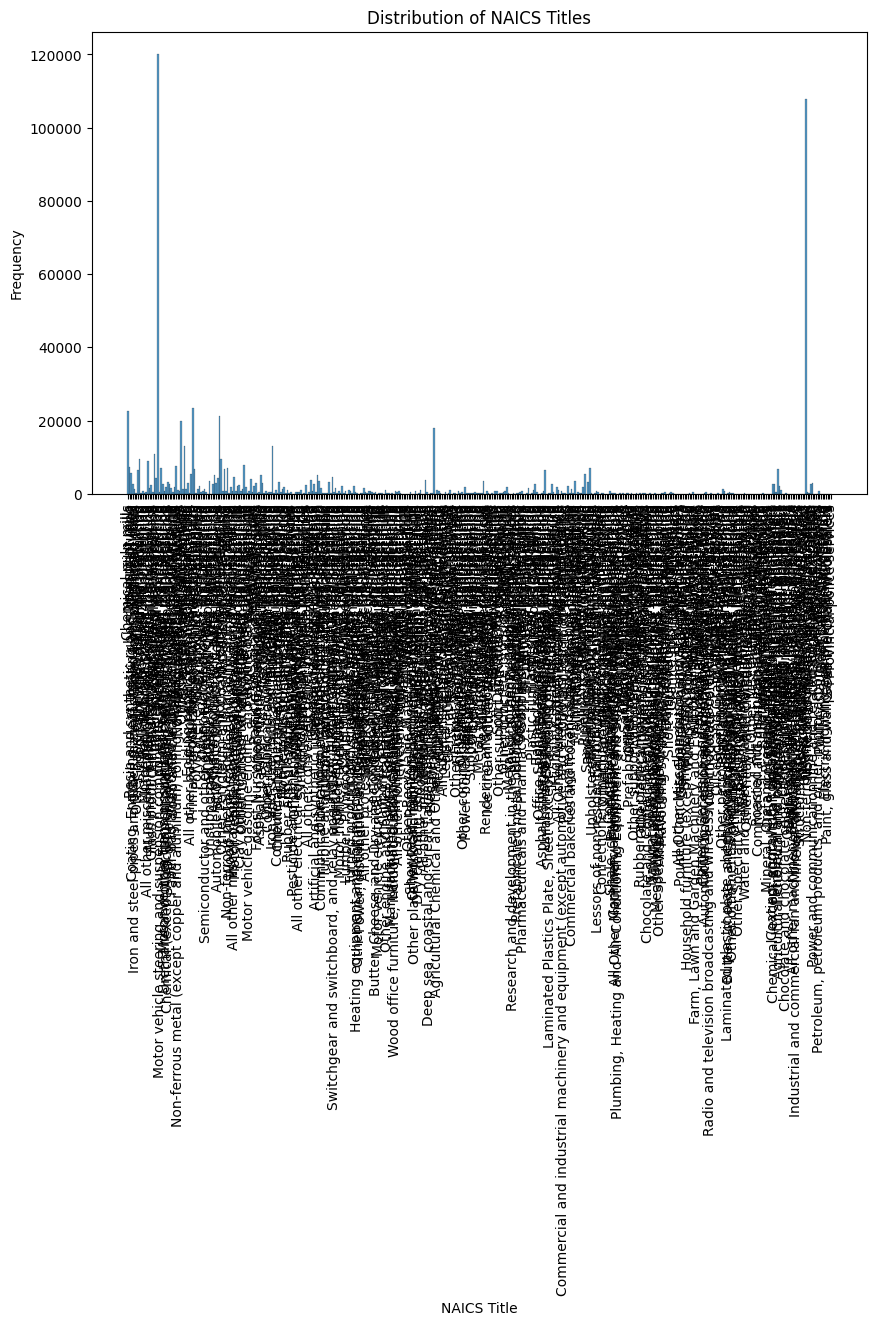

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['NAICS_Title'])
plt.title('Distribution of NAICS Titles')
plt.xlabel('NAICS Title')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()